In [33]:
# Import required libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
# Set matplotlib
%matplotlib inline


In [43]:
# function to create and run and visualize circuit
def run_circuit(gate_sequence, circuit_name):
# Create a quantum circuit with 1 qubit and 1 classical bit
    qc = QuantumCircuit(1, 1)

# Apply gates based on the sequence
    for gate in gate_sequence:
        if gate == 'H':
            qc.h(0)
        elif gate == 'X':
            qc.x(0)

    #Measure qubit
    qc.measure(0, 0)

    #display quantum circuit
    print(f"\nCircuit: {circuit_name}")
    fig = plt.figure()
    qc.draw(output = 'mpl', ax = fig.gca())
    plt.show()
    # Save the circuit
    fig.savefig(f"{circuit_name.replace(' ', '_').lower()}_circuit.png")
    print(f"Circuit saved as '{circuit_name.replace(' ', '_').lower()}_circuit.png'")
    plt.close(fig)
    #run the simulation
    simulator = AerSimulator()
    job = simulator.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    # display measurement results
    print(f"\nMeasurement Results for {circuit_name} (counts of |0> and |1>):")
    print(counts)

    # display histogram
    print(f"\nHistogram for {circuit_name}:")
    fig = plt.figure()
    plot_histogram(counts, ax = fig.gca())
    plt.show()
    # Save the histogram
    fig.savefig(f"{circuit_name.replace(' ', '_').lower()}_histogram.png")
    print(f"Histogram saved as '{circuit_name.replace(' ', '_').lower()}_histogram.png'")
    plt.close(fig)

In [45]:
#test different gate combinations
combinations = [
    (['H'], "Hadamard Only"),
    (['X'], "X Only"),
    (['H', 'X'], "Hadamard then X"),
    (['X', 'H'], "X then Hadamard"),
    (['H', 'H'], "Two Hadamards")
]


Circuit: Hadamard Only


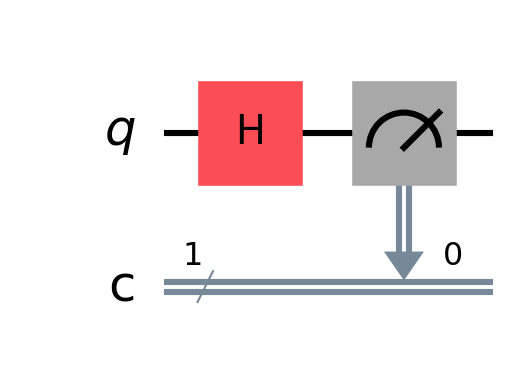

Circuit saved as 'hadamard_only_circuit.png'

Measurement Results for Hadamard Only (counts of |0> and |1>):
{'0': 504, '1': 520}

Histogram for Hadamard Only:


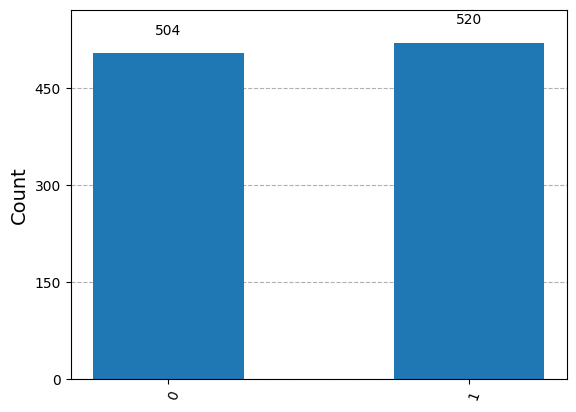

Histogram saved as 'hadamard_only_histogram.png'

Circuit: X Only


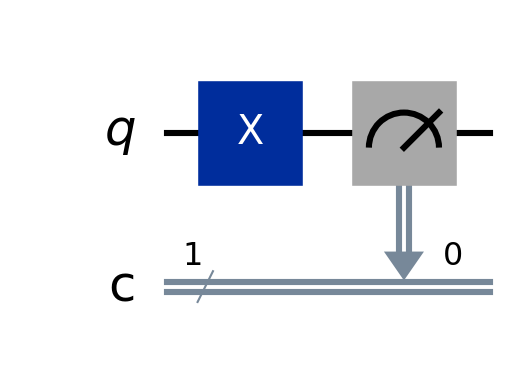

Circuit saved as 'x_only_circuit.png'

Measurement Results for X Only (counts of |0> and |1>):
{'1': 1024}

Histogram for X Only:


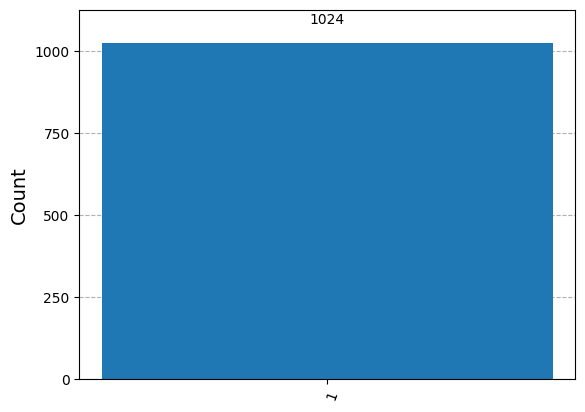

Histogram saved as 'x_only_histogram.png'

Circuit: Hadamard then X


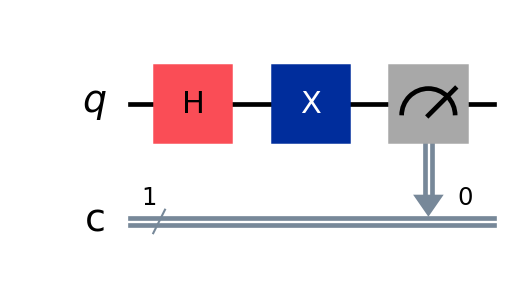

Circuit saved as 'hadamard_then_x_circuit.png'

Measurement Results for Hadamard then X (counts of |0> and |1>):
{'1': 543, '0': 481}

Histogram for Hadamard then X:


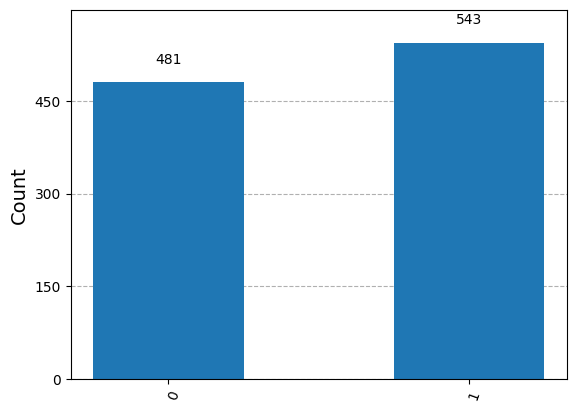

Histogram saved as 'hadamard_then_x_histogram.png'

Circuit: X then Hadamard


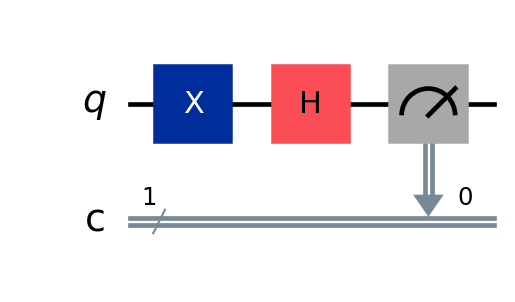

Circuit saved as 'x_then_hadamard_circuit.png'

Measurement Results for X then Hadamard (counts of |0> and |1>):
{'0': 514, '1': 510}

Histogram for X then Hadamard:


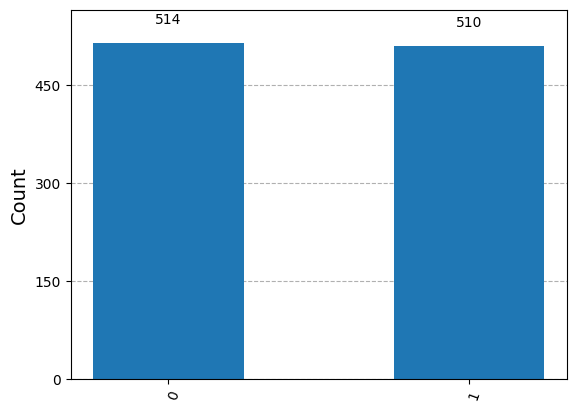

Histogram saved as 'x_then_hadamard_histogram.png'

Circuit: Two Hadamards


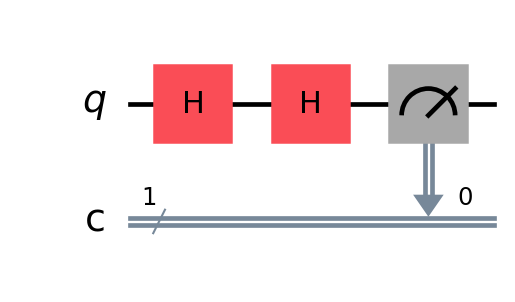

Circuit saved as 'two_hadamards_circuit.png'

Measurement Results for Two Hadamards (counts of |0> and |1>):
{'0': 1024}

Histogram for Two Hadamards:


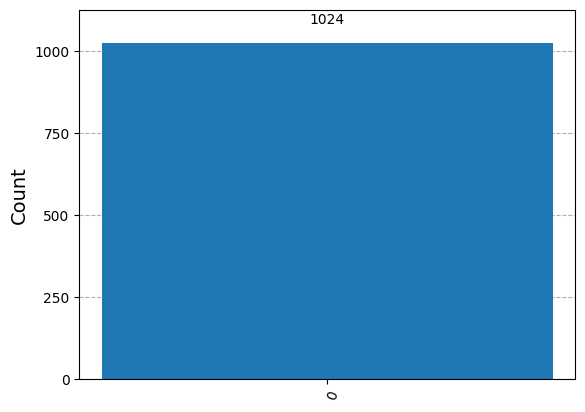

Histogram saved as 'two_hadamards_histogram.png'


In [47]:
# Run each combination
for gates, name in combinations:
    run_circuit(gates, name)

In [49]:
#Analysis results
print("\nAnalysis:")
print("- Hadamard Only: Creates superposition, ~50-50 chance of |0> or |1>.")
print("- X Only: Flips |0> to |1>, so 100% |1>.")
print("- Hadamard then X: Superposition, then flip, shifts probabilities.")
print("- X then Hadamard: Flips to |1>, then superposition, ~50-50.")
print("- Two Hadamards: H.H = Identity, returns to |0>.")


Analysis:
- Hadamard Only: Creates superposition, ~50-50 chance of |0> or |1>.
- X Only: Flips |0> to |1>, so 100% |1>.
- Hadamard then X: Superposition, then flip, shifts probabilities.
- X then Hadamard: Flips to |1>, then superposition, ~50-50.
- Two Hadamards: H.H = Identity, returns to |0>.
